# Moving Average Convergence Divergence (MACD)

Moving Average Convergence Divergence (MACD) is a trend indicator. MACD fast line is usually 12-period moving average while MACD slow line is usually 26-period moving average. The difference between the MACD fast and slow lines is the signal line. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2016-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,2.77,2.82,2.63,2.77,2.77,32516800
2016-01-05,2.77,2.80,2.64,2.75,2.75,12972300
2016-01-06,2.66,2.71,2.47,2.51,2.51,23759400
2016-01-07,2.43,2.48,2.26,2.28,2.28,22203500
2016-01-08,2.36,2.42,2.10,2.14,2.14,31822400


In [3]:
import talib as ta

In [4]:
df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist
Date,,,,,,,,,
2018-12-24,16.520000,17.219999,16.370001,16.650000,16.650000,62933100,-1.014336,-0.696516,-0.317820
2018-12-26,16.879999,17.910000,16.030001,17.900000,17.900000,108811800,-1.004059,-0.758025,-0.246034
2018-12-27,17.430000,17.740000,16.440001,17.490000,17.490000,111373000,-1.017271,-0.809874,-0.207397
2018-12-28,17.530001,18.309999,17.139999,17.820000,17.820000,109214400,-0.989704,-0.845840,-0.143864
2018-12-31,18.150000,18.510000,17.850000,18.459999,18.459999,84732200,-0.905774,-0.857827,-0.047947


In [6]:
df = df.dropna()

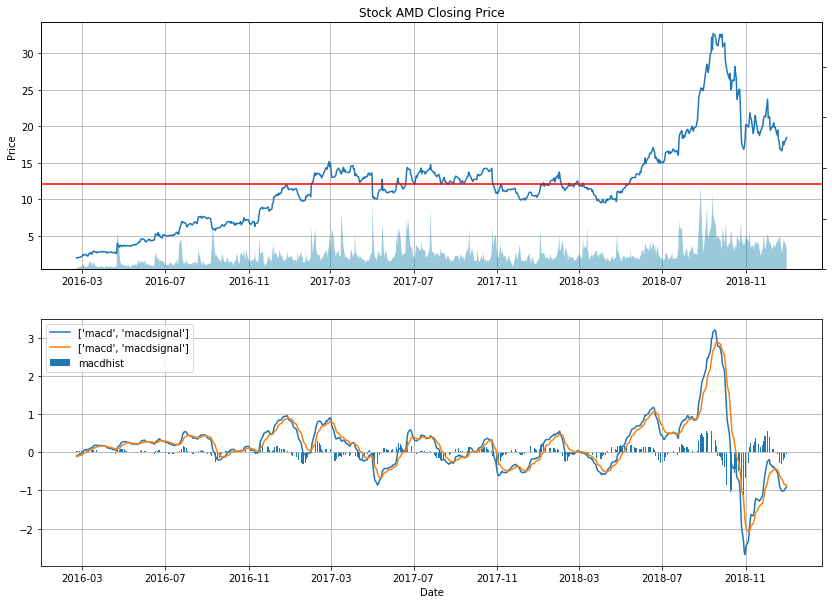

In [7]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], label='macdhist')
ax2.grid()
ax2.set_xlabel('Date')
ax2.legend(loc='best')

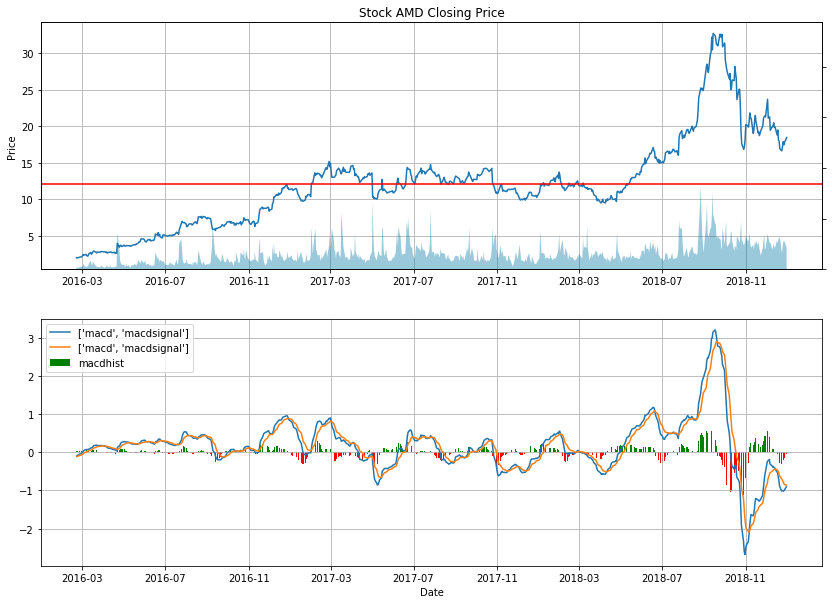

In [8]:
# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.grid()
#ax1.grid(True, which='both')
#ax1.grid(which='minor', linestyle='-', linewidth='0.5', color='black')
#ax1.grid(which='major', linestyle='-', linewidth='0.5', color='red')
#ax1.minorticks_on()
#ax1.legend(loc='best')
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_xlabel('Date')
ax2.legend(loc='best')

## Candlestick with MACD

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['macd'], dfc['macdsignal'], dfc['macdhist'] = ta.MACD(dfc['Adj Close'], fastperiod=12, slowperiod=26, signalperiod=9)
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,macd,macdsignal,macdhist,positive
0,736062.0,2.70,2.76,2.68,2.74,2.74,8489000,0.158363,0.226933,-0.068570,False
1,736065.0,2.76,2.82,2.74,2.76,2.76,9045100,0.146750,0.210897,-0.064147,False
2,736066.0,2.79,2.85,2.76,2.81,2.81,16110100,0.139967,0.196711,-0.056744,False
3,736067.0,2.78,2.82,2.73,2.80,2.80,8048000,0.132260,0.183821,-0.051560,False
4,736068.0,2.77,2.79,2.70,2.72,2.72,8935400,0.118333,0.170723,-0.052390,False


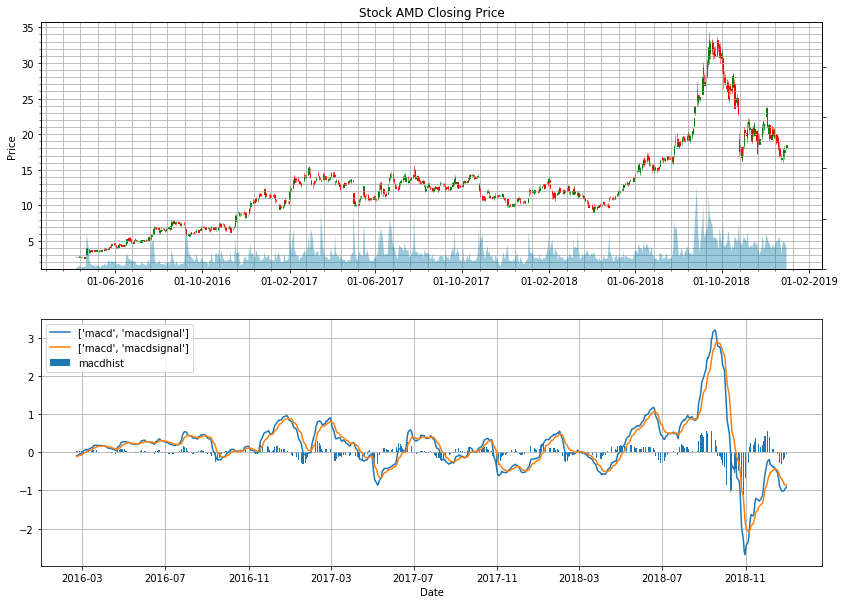

In [10]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
ax1v.fill_between(dfc.Date, 0, dfc.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')


labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], label='macdhist')
ax2.grid()
ax2.set_xlabel('Date')
ax2.legend(loc='best')

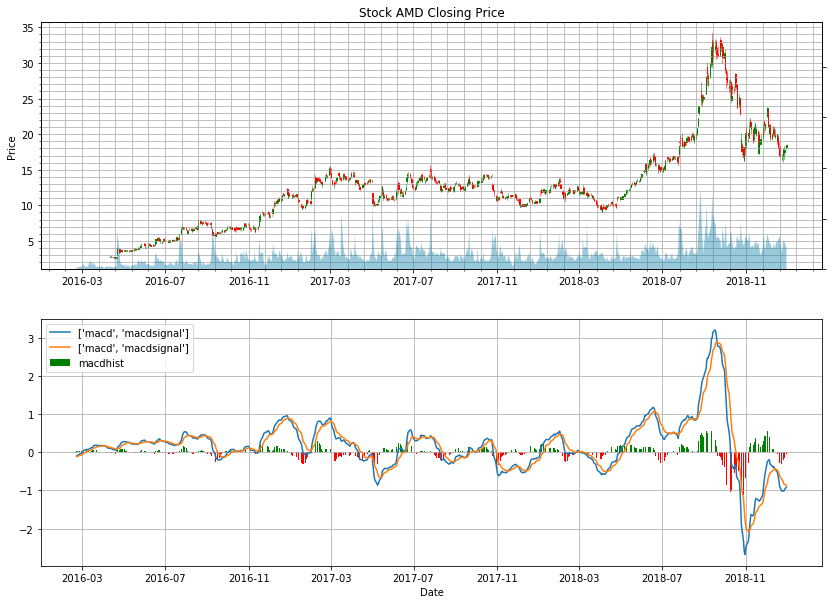

In [11]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
ax1v.fill_between(df.index[0:],0, df.Volume[0:], facecolor='#0079a3', alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

labels = ['macd','macdsignal']
ax2 = plt.subplot(2, 1, 2)
df['positive'] = df['macdhist'] > 0
ax2.plot(df[['macd','macdsignal']], label=labels)
ax2.bar(df.index, df['macdhist'], color=df.positive.map({True: 'g', False: 'r'}), label='macdhist')
ax2.grid()
ax2.set_xlabel('Date')
ax2.legend(loc='best')